In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_csv("/content/gdrive/MyDrive/kenya_political_tweets.csv")

# Convert 'tweet' column to string type
df['tweet'] = df['tweet'].astype(str)

# Create a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

# sentiment analysis on each tweet and add the results as a new column
df['sentiment'] = df['tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

def map_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['sentiment'].apply(map_sentiment)

# Save the DataFrame with sentiment analysis results to a new CSV file
df.to_csv("sentiment_analysis_results.csv", index=False)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


              precision    recall  f1-score   support

    negative       0.82      0.27      0.41        33
     neutral       0.63      0.79      0.70        87
    positive       0.61      0.60      0.60        70

    accuracy                           0.63       190
   macro avg       0.68      0.56      0.57       190
weighted avg       0.65      0.63      0.61       190

[[ 9 14 10]
 [ 1 69 17]
 [ 1 27 42]]
Accuracy: 0.631578947368421


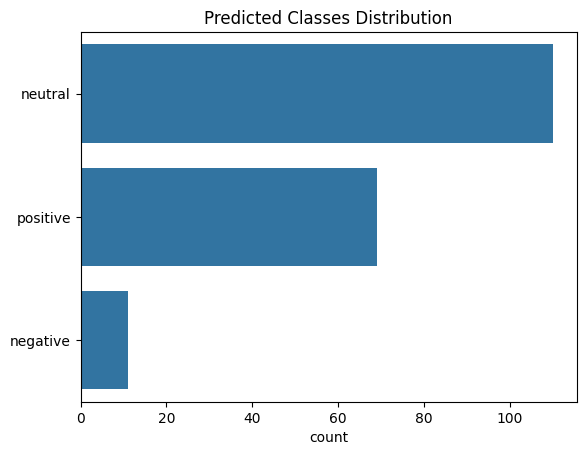

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv("/content/sentiment_analysis_results.csv")

# Handle missing values
df.dropna(inplace=True)

# Convert categorical variables to numerical format (if needed)
df['user_verified'] = df['user_verified'].astype(int)


# Convert 'user_followers' and 'user_friends' columns to numeric
df['user_followers'] = pd.to_numeric(df['user_followers'], errors='coerce')
df['user_friends'] = pd.to_numeric(df['user_friends'], errors='coerce')

# Drop rows with NaN after conversion
df.dropna(subset=['user_followers', 'user_friends'], inplace=True)


df['followers_friends_ratio'] = df['user_followers'] / df['user_friends']

# Splitting data into training and testing sets
#X = df[['user_followers', 'user_friends', 'retweets', 'hashtags', 'followers_friends_ratio', 'tweet']]

X = df[['retweets', 'hashtags', 'followers_friends_ratio', 'tweet']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
model = make_pipeline(
    TfidfVectorizer(),
    StandardScaler(with_mean=False),
    LogisticRegression()
)
model.fit(X_train['tweet'], y_train)

# Model evaluation
y_pred = model.predict(X_test['tweet'])
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualization
sns.countplot(y_pred)
plt.title('Predicted Classes Distribution')
plt.show()
z
